# TP 2 - Régression

## Prédiction des prix de l'immobilier à Boston dans les années 1970

La prédiction du prix de maisons bostoniennes des années 1970, dont les données sont issues de la base *Boston House Prices*, créée par D. Harrison et D.L. Rubinfeld à l'Université de Californie à Irvine (http://archive.ics.uci.edu/ml/machine-learning-databases/housing/), est un problème classique d'apprentissage supervisé. 

<img src="https://1.bp.blogspot.com/-sCZIatDf9LQ/XGm-lEHXnAI/AAAAAAAAPxQ/kv8S8fdgudAwWTFuJhuAoiykLmWLCoOtgCLcBGAs/s1600/197010xx-GovernmentCenter-Boston_resize.JPG" width=600 />

Plus précisément, le label à prédire dans cette base de données est le prix médian par quartier de l'immobilier (en milliers de dollars). Il s'agit donc d'un problème de régression puisque l'on veut inférer des valeurs continues. Pour ce faire, on dispose de 13 entrées offrant les informations suivantes : 

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- TAX - full-value property-tax rate per \$10,000
- RAD - index of accessibility to radial highways
- PTRATIO - pupil-teacher ratio by town
- B $ = 1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - percentage lower status of the population

L'objectif de ce TP est d'arriver à prédire au plus près les valeurs médianes de prix de maison par quartier.


In [2]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers

%matplotlib inline

In [3]:
def plot_loss(val_loss, train_loss, ymax=100):
  plt.plot(val_loss, color='green', label='Erreur de validation')
  plt.plot(train_loss, color='blue', linestyle='--', label='Erreur d\'entraînement')
  plt.xlabel('Epochs')
  plt.ylim(0, ymax)
  plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
  plt.legend()

# Chargement des données

In [4]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


# Architecture envisagée

In [5]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

2024-05-28 15:12:30.979889: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 15:12:31.022297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 15:12:31.022536: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Entraînement du réseau

In [6]:
optim = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 542.3704 - mae: 21.3951
Epoch 2/50


2024-05-28 15:12:33.236868: I external/local_xla/xla/service/service.cc:168] XLA service 0x74c51d798a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-28 15:12:33.236904: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A500 Laptop GPU, Compute Capability 8.6
2024-05-28 15:12:33.247848: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1716901953.286892   24370 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 542.3704 - mae: 21.3950
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 542.3704 - mae: 21.3951
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3703 - mae: 21.3951
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3951
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 542.3704 - mae: 21.3950
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 542.3704 - mae: 21.3950
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 542.3704 - mae: 21.3951
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 542.3704 - mae: 21.3950
Epoch 12/50
13/13 [==============================

# Evaluation du modèle

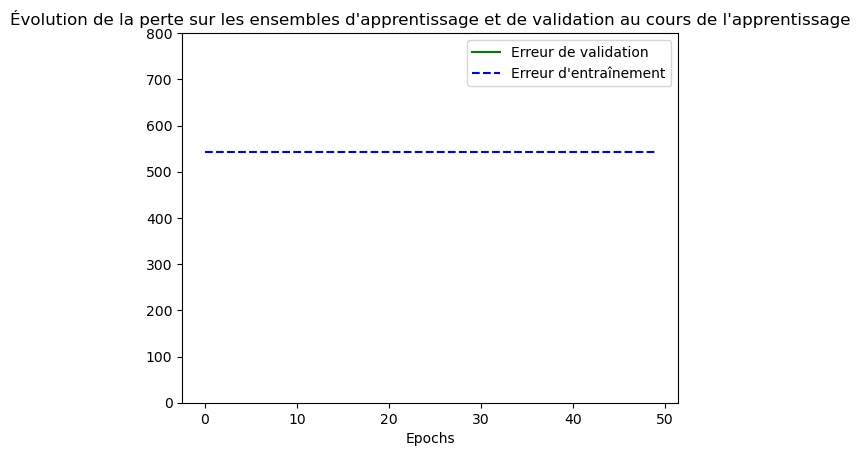

In [7]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)
#val_loss=(history.history['val_loss'])
#plot_loss(val_loss, train_loss, ymax=500)

In [8]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 570.7010 - mae: 22.0784


[570.7009887695312, 22.078432083129883]

On obtient une mae d'environ 22, ce qui signie que l'on est éloigné en moyenne de 22000$ de la vérité terrain.


# Travail à faire 

L'approche présentée ci-dessus apporte des résultats décevants, en raison de  quelques maladresses, voire erreurs. Dans un premier temps, vous devez **trouver et corriger ces problèmes**.

Dans un second temps, cherchez à améliorer les performances du modèle. Vous pouvez atteindre sans trop de difficulté un score de MAE inférieur à 3 sur l'ensemble de test. A chaque nouveau test, vous devez évaluer si votre réseau est en sous-apprentissage, ou en sur-apprentissage, et en déduire des modifications possibles pour en améliorer les performances.

MAE de test à battre si vous aimez les défis : **2.20** !


In [132]:
from keras.layers import Dropout # AJOUT

# Création de l'architecture 
model2 = Sequential()
#model2.add(Dense(4, activation='relu', input_dim=13))      # INITIAL
model2.add(Dense(32, activation='elu', input_dim=13))     # MODIF
model2.add(Dense(32, activation='log_softmax'))     # MODIF
#model2.add(Dense(1, activation='linear'))
#model2.add(Dropout(0.2))
#model2.add(Dropout(0.2))
#model2.add(Dense(10, activation='tanh'))                      # AJOUT
#model2.add(Dense(9, activation='softmax'))                      # AJOUT
#model2.add(Dropout(0.2))
#model2.add(Dense(7, activation='sigmoid'))                      # AJOUT
#model2.add(Dropout(0.2))
#model2.add(Dense(7, activation='tanh'))                      # AJOUT
#model2.add(Dropout(0.2))
#model2.add(Dense(7, activation='mish'))                      # AJOUT
#model2.add(Dropout(0.2))
#model2.add(Dense(3, activation='tanh'))                      # AJOUT
#model2.add(Dense(3, activation='log_softmax'))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                448       
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 dense_61 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
x_train_normalized = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
x_test_normalized = (x_test - x_test.mean(axis=0)) / x_test.std(axis=0)

In [134]:
optim2 = optimizers.Adam(learning_rate = 0.01)
model2.compile(optimizer=optim2, loss='mae', metrics=['mae'])

history2 = model2.fit(x_train_normalized, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 10.4946 - mae: 10.4946
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 4.4249 - mae: 4.4249
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 3.1126 - mae: 3.1126
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 2.6586 - mae: 2.6586
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 2.4149 - mae: 2.4149
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 2.2981 - mae: 2.2981
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 2.2380 - mae: 2.2380
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 2.1504 - mae: 2.1504
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 2.1367 - mae: 2.1367
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 2.1403 - mae: 2.1403
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - 

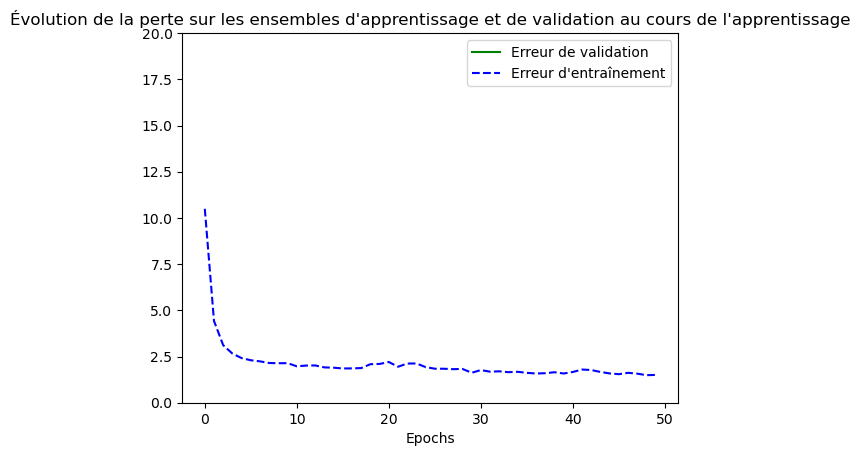

In [135]:
train_loss2=(history2.history['loss'])
plot_loss([], train_loss2, ymax=20)
#val_loss=(history.history['val_loss'])
#plot_loss(val_loss, train_loss, ymax=500)

In [136]:
model2.evaluate(x_test_normalized, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.4464 - mae: 2.4464


[2.446434259414673, 2.446434259414673]